## What is micrograd

Micrograd is a 150 line codes of python library created by Andrej Karpathy, to understand how we can implement backpropagation in python and use the backpropagtion for efficent training of a neural network

### Pre-requisites

1. Understanding of calculus


In [6]:
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline  
# this is a magic function that allows plotting of matplotlib graph directly in the jupyter notebook

In [7]:
# lets build a simple quadratic function
def f(x):
    return 4*x**2 - 5*x + 3
f(3.0)

24.0

[-5.   -4.75 -4.5  -4.25 -4.   -3.75 -3.5  -3.25 -3.   -2.75 -2.5  -2.25
 -2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.    2.25  2.5   2.75  3.    3.25  3.5   3.75
  4.    4.25  4.5   4.75]
[128.  117.  106.5  96.5  87.   78.   69.5  61.5  54.   47.   40.5  34.5
  29.   24.   19.5  15.5  12.    9.    6.5   4.5   3.    2.    1.5   1.5
   2.    3.    4.5   6.5   9.   12.   15.5  19.5  24.   29.   34.5  40.5
  47.   54.   61.5  69.5]


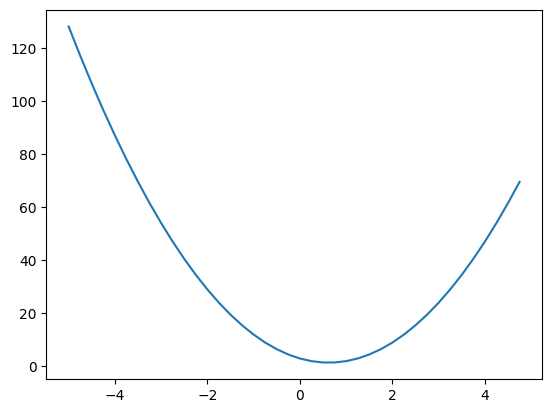

In [13]:
x_s = np.arange(-5, 5, 0.25)
print(x_s)
y_s = f(x_s)
print(y_s)
plt.plot(x_s, y_s)

In [28]:
# now lets calculate a gradient
h = 0.000001
x = 5/8
(f(x +h) - f(x)) /h

3.999911513119514e-06

Let's get more complex equation

In [29]:
h = 0.001 

# inputs
a = 2.0
b = -3.0
c = 10.0

d1 = a*b +c
a += h
d2 = a*b +c

print("d1", d1)
print("d2", d2)
print("slope", (d2-d1)/h)

d1 4.0
d2 3.997
slope -3.0000000000001137


In [42]:
# now we would create a class in python
class Value:
    def __init__(self, data, _children= (), _op=''):
        self.data = data
        self.grad = 0
        self._prev = set(_children)
        self._op = _op
    def __repr__(self):
        return f"Value(data={self.data})"
    def __add__(self, other):
        out = Value(self.data + other.data, (self, other), "+")
        return out
    def __mul__(self, other):
        out = Value(self.data * other.data, (self, other), "*")
        return out
    
a = Value(2.0)
b = Value(-3.0)
c = a+ b

In [45]:
c._prev
c._op


'+'